In [15]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

spark = SparkSession.builder.getOrCreate()

path = "babynames1880-2020.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(path)
df.show()

+----+---------+------+------+----+
|Year|     Name|Gender|Births|Rank|
+----+---------+------+------+----+
|2020|     Liam|     M| 19659|   1|
|2020|     Noah|     M| 18252|   2|
|2020|   Oliver|     M| 14147|   3|
|2020|   Elijah|     M| 13034|   4|
|2020|  William|     M| 12541|   5|
|2020|    James|     M| 12250|   6|
|2020| Benjamin|     M| 12136|   7|
|2020|    Lucas|     M| 11281|   8|
|2020|    Henry|     M| 10705|   9|
|2020|Alexander|     M| 10151|  10|
|2020|    Mason|     M| 10029|  11|
|2020|  Michael|     M|  9717|  12|
|2020|    Ethan|     M|  9464|  13|
|2020|   Daniel|     M|  9419|  14|
|2020|    Jacob|     M|  9196|  15|
|2020|    Logan|     M|  9086|  16|
|2020|  Jackson|     M|  9051|  17|
|2020|     Levi|     M|  9005|  18|
|2020|Sebastian|     M|  8927|  19|
|2020|    Mateo|     M|  8900|  20|
+----+---------+------+------+----+
only showing top 20 rows



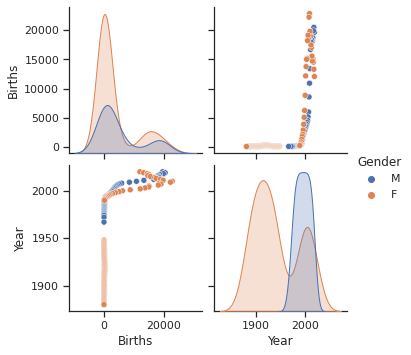

In [6]:
# Rikke

male = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Liam")
female = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Isabella")

gender_df = male.union(female).toPandas()
pd.set_option("display.max_rows", None, "display.max_columns", None)

sns.set(style="ticks")
sns.pairplot(gender_df, hue="Gender")
plt.show()

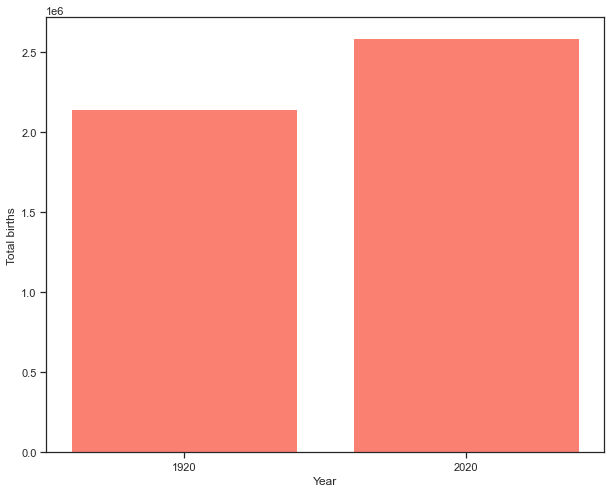

In [3]:
# Richard

df1 = df.select(['Year','Births']).filter(df.Year == 2020) 
df2 = df.select(['Year','Births']).filter(df.Year == 1920)
df1 = df1.groupby('Year').agg(F.sum('Births').alias('Total_births'))
df2 = df2.groupby('Year').agg(F.sum('Births').alias('Total_births'))

dataf = df1.union(df2).toPandas()
dataf = dataf.sort_values('Year')

labels = dataf.Year
births = dataf.Total_births
ind = [x for x, _ in enumerate(labels)]
plt.figure(figsize=(10,8))
plt.bar(ind, births, width=0.8, label='births', color='salmon')
plt.xticks(ind, labels)
plt.ylabel("Total births")
plt.xlabel("Year")
plt.show()

In [4]:
# Kristoffer

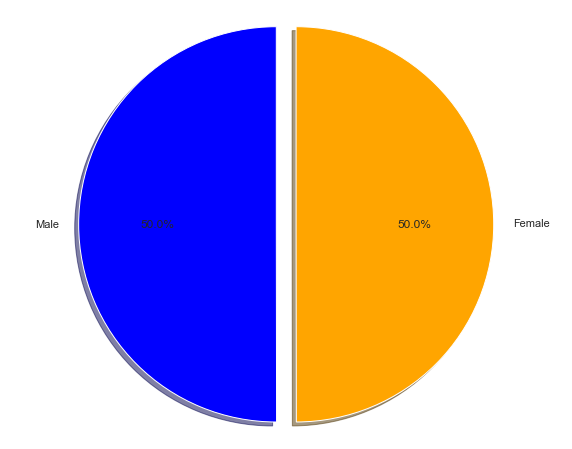

In [5]:
# Miriam
# Data to plot
labels = "Male","Female"
M_count = df.select("Gender").where(df.Gender == "M").count()/df.select("Gender").count()
F_count = df.select("Gender").where(df.Gender == "F").count()/df.select("Gender").count()
colors = ['blue', 'orange']
explode = (0, 0.1) # explode 1st slice

# Plot
plt.figure(figsize=(10,8))
plt.pie(x=[M_count,F_count], explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

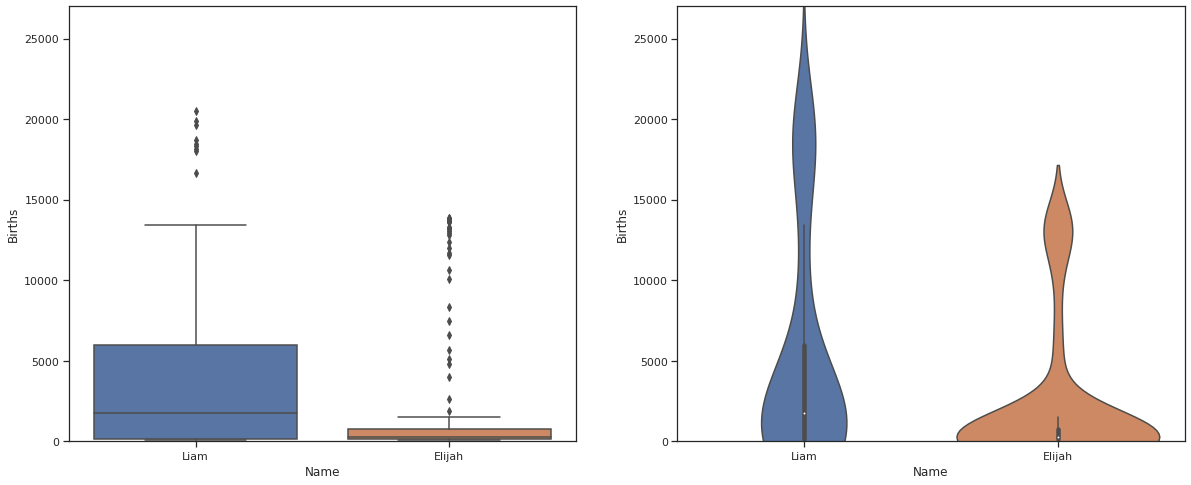

In [17]:
# Kasper
x1 = df.select("Births", "Name").where(df.Name=="Liam")
x2 = df.select("Births", "Name").where(df.Name=="Elijah")

births_df = x1.union(x2).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=births_df, x="Name", y="Births").set_ylim(0,27000)
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=births_df, x="Name", y="Births").set_ylim(0,27000)


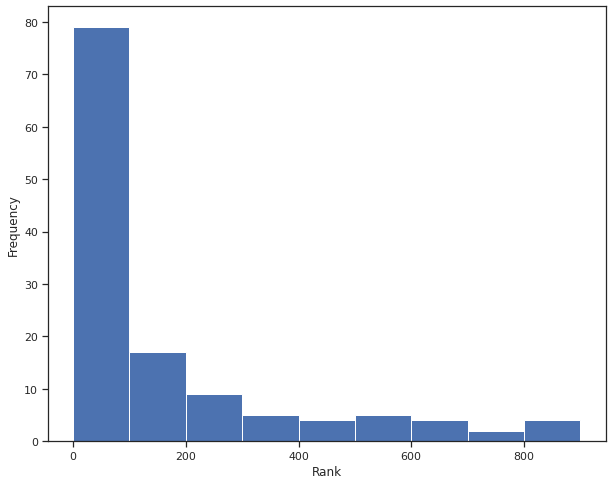

In [31]:
# Jeppe Histogram
data = df.select("Rank", "Name").where(df.Name=="Howard")
df_noah = data.toPandas()
bins = np.arange(0, 1000, 100)

plt.figure(figsize=(10,8))
plt.hist(df_noah['Rank'], bins)

plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.show()

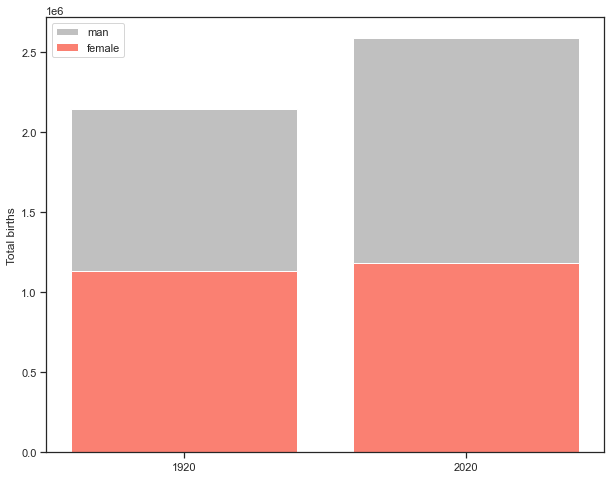

In [8]:
# Richard
df1 = df.select(['Year','Births', 'Gender']).filter(df.Year == 2020) 
df2 = df.select(['Year','Births', 'Gender']).filter(df.Year == 1920)
df1 = df1.groupby('Year', 'Gender').agg(F.sum('Births').alias('Total_births'))
df2 = df2.groupby('Year', 'Gender').agg(F.sum('Births').alias('Total_births'))

dataf = df1.union(df2).toPandas()
dataf = dataf.sort_values('Year')

male_df = dataf[dataf.Gender == 'M']
female_df = dataf[dataf.Gender == 'F']

labels = male_df['Year']
male = male_df['Total_births']
female = female_df['Total_births']
ind = [x for x, _ in enumerate(labels)]
plt.figure(figsize=(10,8))

plt.bar(ind, male, width=0.8, label='man', color='silver', bottom=female)
plt.bar(ind, female, width=0.8, label='female', color='salmon')
plt.xticks(ind, labels)
plt.ylabel("Total births")
plt.legend(loc="upper left")
plt.show()